In [1]:
import keras
from keras.models import Model, load_model


Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
images = pd.read_csv('hmnist_64_64_L.csv')
images = np.array(images) #dim = (4097,1)
X = images[:,0:4096]
num_samples = len(X)
X = np.reshape(X, (num_samples,64,64,1))
print(X.shape)
y = images[:,4096]    #label: 8 class, index 1,2,...8
plt.imshow(X[0][:,:,0])

(5000, 64, 64, 1)


In [3]:
model = load_model('Conv2D_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

In [24]:
from keras import backend as K
get_5th_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[4].output])
layer_5_output = get_5th_layer_output([X[0:5000:5]/255,0])

In [25]:
get_8th_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[7].output])
layer_8_output = get_8th_layer_output([X[0:5000:5]/255,0])

In [26]:
layer_5_output = np.array(layer_5_output)
layer_5_output.shape

(1, 1000, 31, 31, 64)

In [27]:
layer_8_output = np.array(layer_8_output)
layer_8_output.shape

(1, 1000, 128)

In [2]:
for i in range(64):
    image = layer_5_output[0,0,:,:,i]
    plt.subplot(8,8, i+1)

    plt.imshow(image)
    plt.axis('off')

NameError: name 'layer_5_output' is not defined

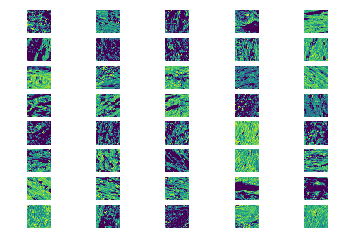

In [22]:
for i in range(40):
    j = i
    image = layer_output[0,j,:,:,4]
    j = j+25
    plt.subplot(8,5, i+1)

    plt.imshow(image)
    plt.axis('off')

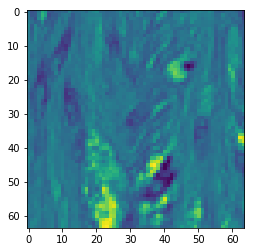

In [18]:
plt.imshow(X[534,:,:,0])

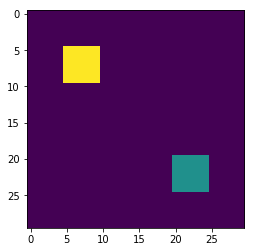

In [19]:
test = np.zeros((30,30))
test[5:10,5:10] = 1
test[20:25,20:25] = 0.5
plt.imshow(test)

In [1]:
layer_8_output_transformed = TSNE(n_components=2,perplexity =10).fit_transform(layer_8_output[0,:,:])

NameError: name 'TSNE' is not defined

In [30]:
layer_8_output_transformed.shape

(1000, 2)

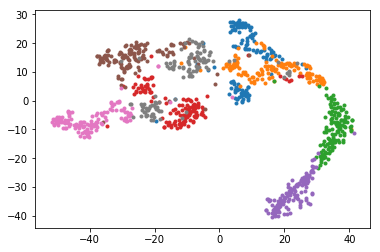

In [32]:
import matplotlib.cm as cm
index_range = range(8)
colors = cm.rainbow(np.linspace(0, 1, len(index_range)))
for i,c in zip(index_range,colors):
    plt.scatter(layer_8_output_transformed[125*i:125*(i+1),0],layer_8_output_transformed[125*i:125*(i+1),1],marker=".")